In [1]:

import h5py  
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
import tqdm.notebook as tqdm
import time
import xpcs_viewer

from numpy import sqrt, sin, cos, pi, exp
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq
from xpcs_viewer import XpcsFile as xf


## Initialization 
* Read the file;
* Set up the vectors for the TTCF - CCS transfer;
* Set up the C2 mask for averaging

In [2]:

fn_dir = os.path.join('/home/8ididata/2021-3/xmlin202112/cluster_results/')
fn1 = 'E089_SiO2_111821_200nm_Exp3_PostPreshear_Preshear100'
fn2 = '_XPCS_02_013_att02_Lq1_001_0001-5000_Twotime_20220124T234730.hdf'

a = xf(fn1+fn2, cwd=fn_dir);

_ = a.get_twotime_c2('exchange', 1)
t_el = np.arange(_.shape[0])*a.t0
C2_dim = _.shape[0]



In [12]:

C2_all = np.empty([C2_dim,C2_dim,np.shape(a.ql_dyn)[0]])

for ii in np.arange(0,np.shape(a.ql_dyn)[0]):
    C2_all[:,:,ii] = a.get_twotime_c2('exchange', ii+1)



## Plot C2

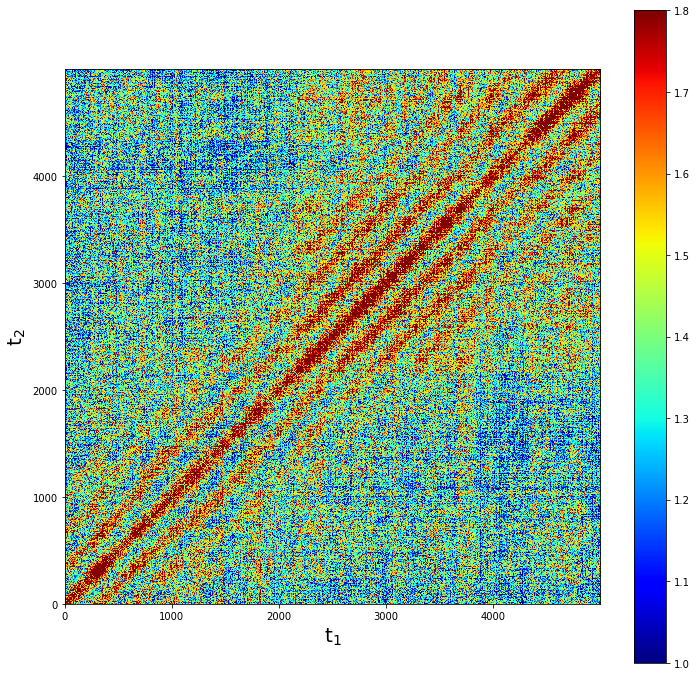

In [17]:

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
ax.set_xlabel('t$_1$', fontsize=fs)
ax.set_ylabel('t$_2$', fontsize=fs)
im = ax.imshow(C2_all[:,:,7], cmap='jet',  interpolation='none', vmin=1, vmax=1.8, origin='lower')
_ = plt.colorbar(im)
